# Ablone case study

# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

# Importing required Libaries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [108]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


This dataset have 9 attributes and 4k+ rows for predicting the age of Abalone

# EDA OF THE DATASET

In [109]:
ds=pd.DataFrame(data=df)
ds

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Shape of the dataset

In [110]:
ds.shape

(4177, 9)

Data set have dimensions of 4177 rows and 9 columns

# Data type of dataset

In [111]:
ds.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

As we can see we have 9 attributes out of which 7 are float64, sex is object type and rings is int64 dtype.

# Info of dataset

In [112]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Data have range of 0 to 4176 with 0 to 8 column index and consuming memory of 294kb .

# Statistics Description

In [114]:
ds.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


-Mean of length is .52mm while std is less than mean showing data  is symetrical distributed as median is also mostly same.
-Diameter max is 0.65 mm with mean of 0.40mm and std is 0.099 which less than mean shows that data is more reliable and spreaded closely to mean
-Whole weight of abalone is avg 0.82 gms and min weight is 0.002 gms
-75%tile weight of meat is 0.50 gms which shows that most of abalone having weight mean below or equal to 0.5 gms.
-While shell weight (after being dried) is avg 0.23 gms which mostly reduced 28% from whole weight .

In [115]:
ds.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Columns names mentioned above

In [116]:
ds.Rings

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

We have int64 continous value in Rings attribute which determines the age of Abalone

# Checking missing or null values in dataset

In [117]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

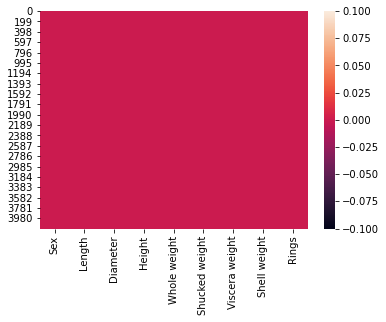

In [118]:
sns.heatmap(ds.isnull())

Above visulatization we can interpet that there are no missing or null value in dataset

# Visualizing the count of sex in Abalone

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

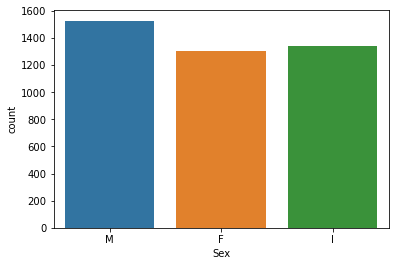

In [119]:
sns.countplot(x='Sex',data=ds)
ds['Sex'].unique()
ds['Sex'].value_counts()

We can see that numberof Males are more in compare to females as well as Infant also.

# Univariate Analysis

<AxesSubplot:>

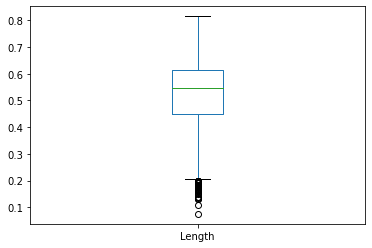

In [120]:
ds['Length'].plot.box()

<AxesSubplot:>

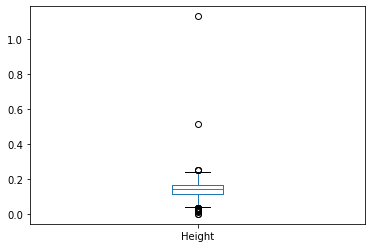

In [121]:
ds['Height'].plot.box()

<AxesSubplot:>

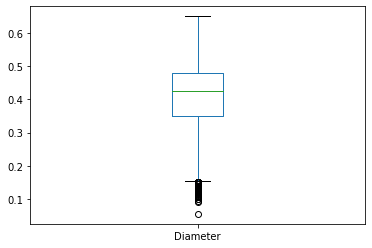

In [122]:
ds['Diameter'].plot.box()

From above boxplots we can see that height variable is having outliers

# Checking the skewness 

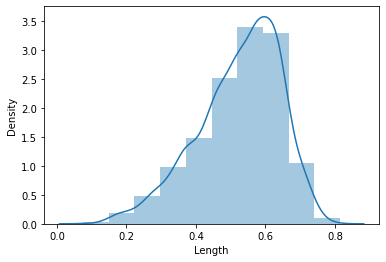

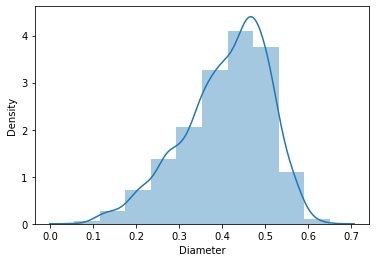

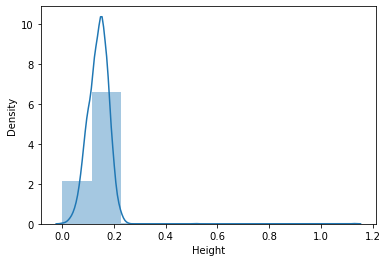

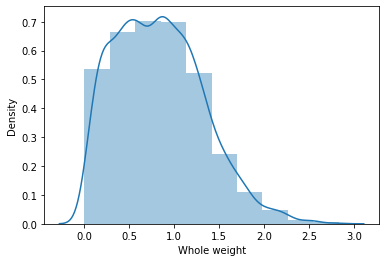

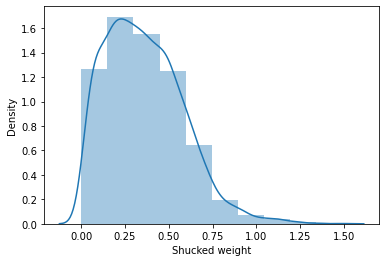

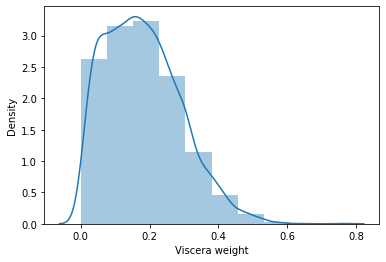

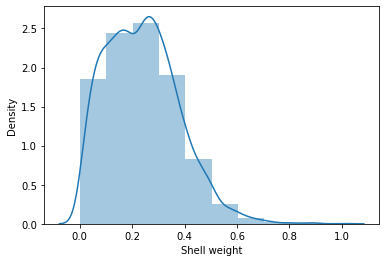

In [123]:
columns=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
for i in columns:
    plt.figure()
    sns.distplot(ds[i],bins=10)

We can visualize that skewness kurtosis is mostly symmetric distributed for all variable except height as it is having outliers so kurtosis is right tailed 

# Target Attribute

In [124]:
ds['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

We can see that Rings attribute age is lies between 1 to 29 years however most of the values are highly concentrated around the median of the distribution.

After 15years we can see there are outliers in Rings attribute mean that data is not relaible or age is not dependent on their size or weight attributes

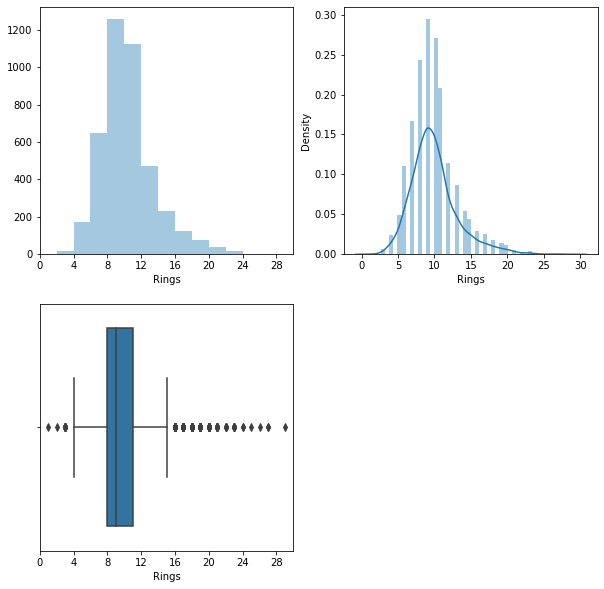

In [125]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(ds['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(ds['Rings'])

<AxesSubplot:xlabel='Rings'>

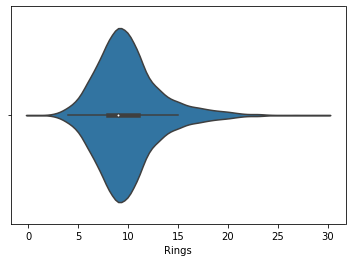

In [126]:
sns.violinplot(x='Rings',data=ds)

In our dataset most of Abalone is having age of 9-10 years 

# Size Attributes

Through the size attributes like length,height and diameter will analyze the dimensions of abalone

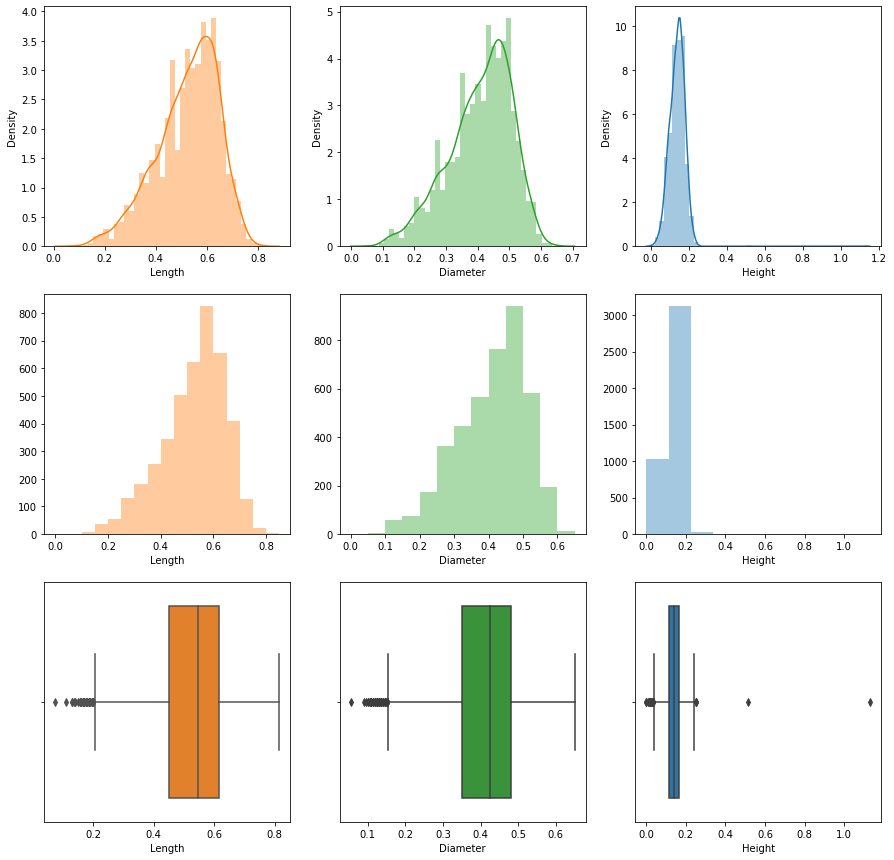

In [127]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(ds['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(ds['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(ds['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(ds['Height'], color=colors[i % 3])

For each of these attributes we plotted two histograms and their respective boxplot. The first histogram is a density histogram and a kernel density estimate, and the second is the absolute frquencies of the attribute, with some adjustments to ticks and bins. Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.

# Weight Attributes

We have 4 attributes related with weight of abalone defines into whole weight,shucked ,viscera and shell (dired)weight , will analyze each of it in same way as size attributes

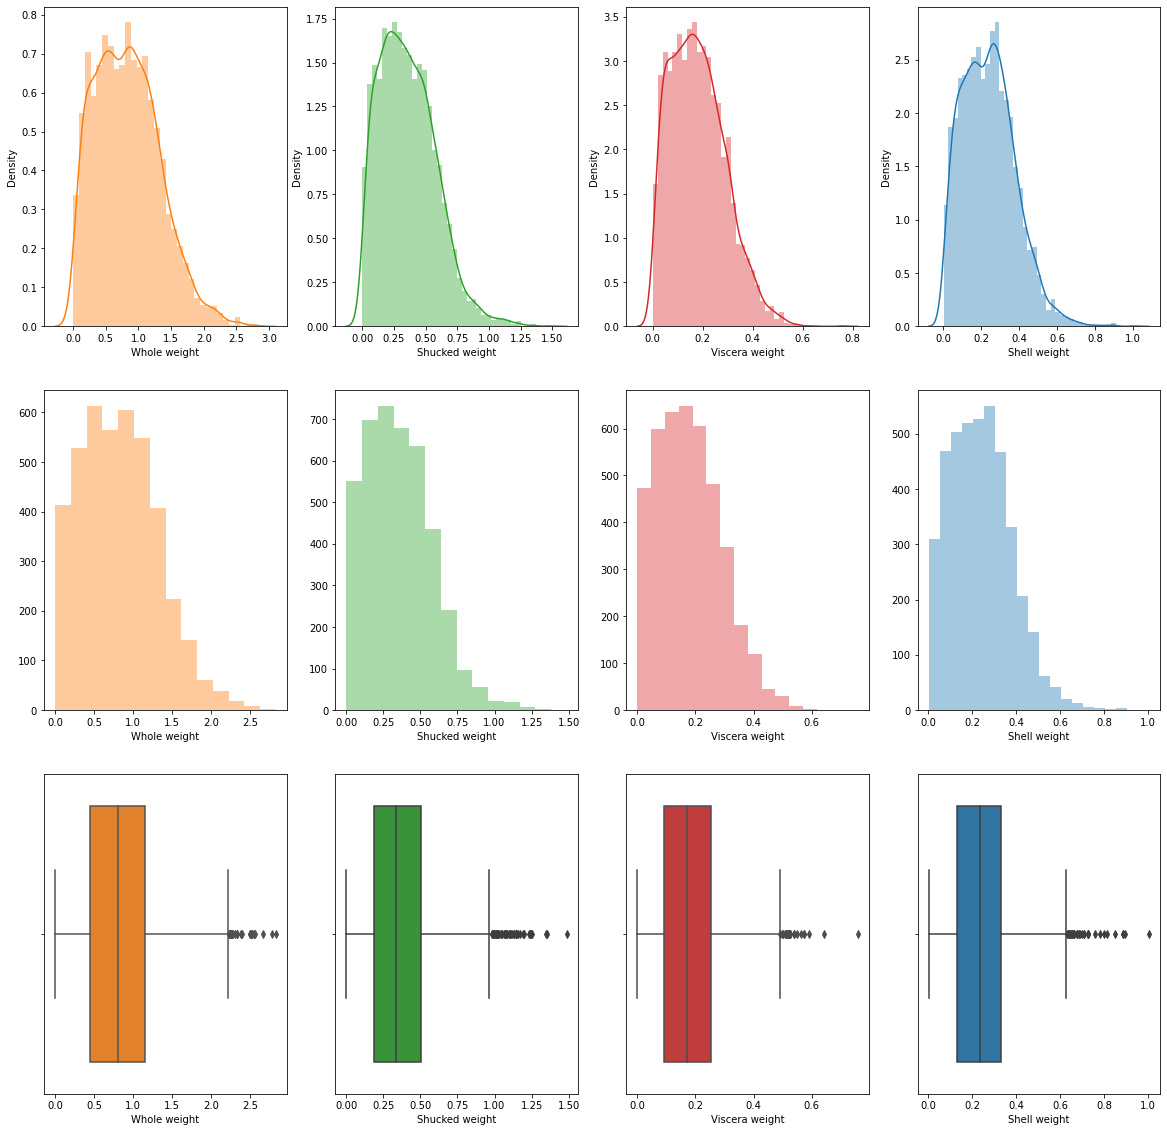

In [128]:
plt.figure(figsize=(20, 20))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Whole weight'], color=colors[i % 4])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Shucked weight'], color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Viscera weight'], color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Shell weight'], color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Whole weight'], kde=False, bins=14, color=colors[i % 4])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Shucked weight'], kde=False, bins=14, color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Viscera weight'], kde=False, bins=16, color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(ds['Shell weight'], kde=False, bins=20, color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(ds['Whole weight'], color=colors[i % 4])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(ds['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(ds['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(ds['Shell weight'], color=colors[i % cols])

A bell curve of each of attribute is little larger and there are few outliers in Viscera ,Shucked and Shell weight

# Bivariate Analysis

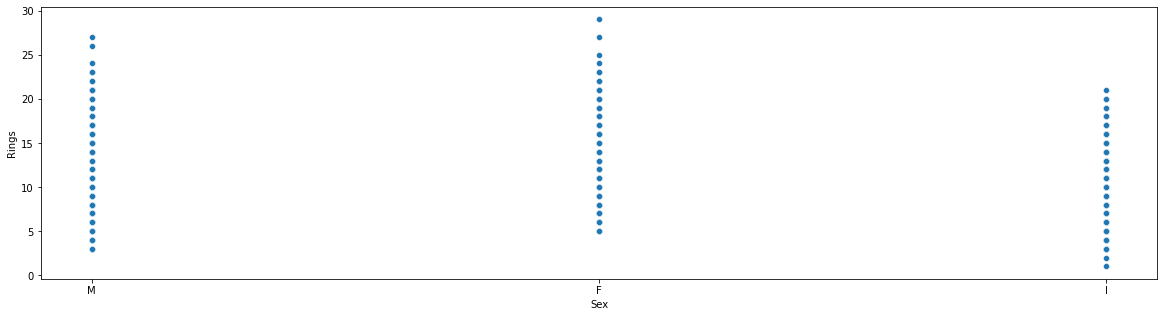

In [129]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Sex',y='Rings',data=ds)
plt.show()

From above scatter plot we can analyze that Abalone females age is between 5-29 years
While Infant abalones are of age 1-21 years
Males are having age in between 3 to 27 years 

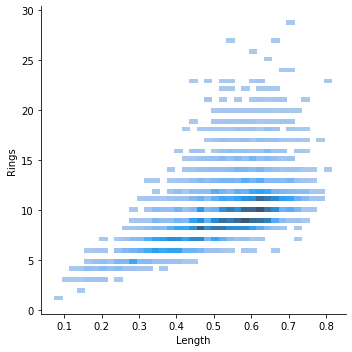

In [130]:
sns.displot(x='Length',y='Rings',data=ds)

As from above plot we can see that along with increase in age length is also increasing showing positive relationship between both.

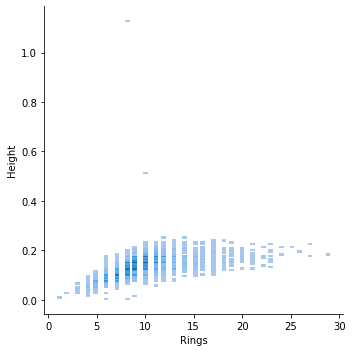

In [131]:
sns.displot(x='Rings',data=ds,y='Height')

Max height of Abalone is 1.13 having 8 years that is Infant Abalone.
From above figure it is analyses that height of abalone is decreasing with increase in age.

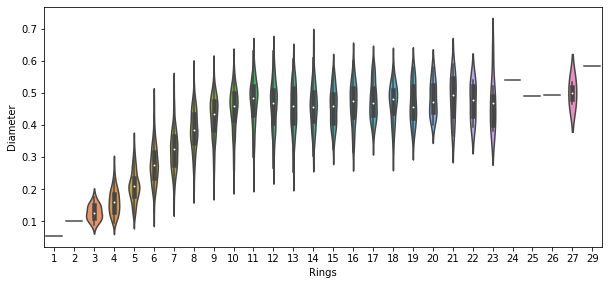

In [132]:
plt.figure(figsize=(10, 15))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=ds, x='Rings', y='Diameter')

With increase in Age of Abalone diameter also increases

# Will check how Sex attribute is related with attributes Rings,weight and height

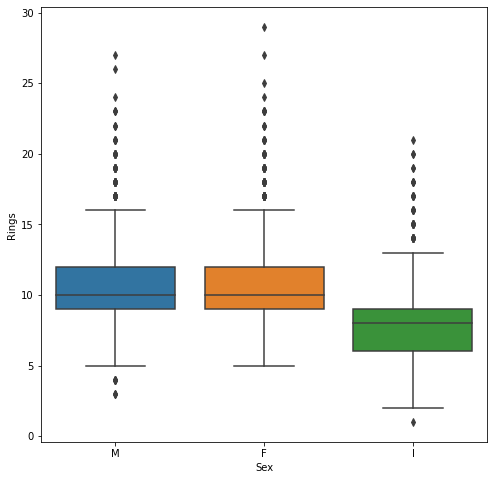

In [133]:
plt.figure(figsize=(8,8))
_ = sns.boxplot(data=ds, x='Sex', y='Rings')

From above boxplot we can analysis that median of Infant is less in compare to M & F.
Most of the samples are concentrated around mean of the rings age.

# Multi-Variate Analysis

<Figure size 1440x360 with 0 Axes>

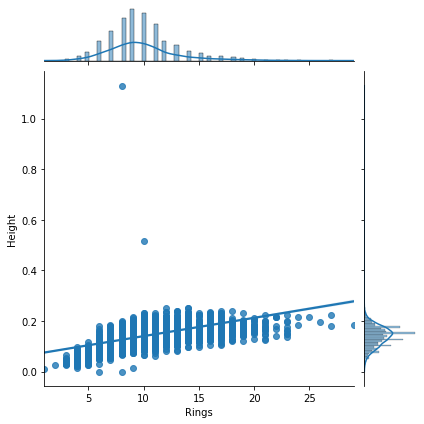

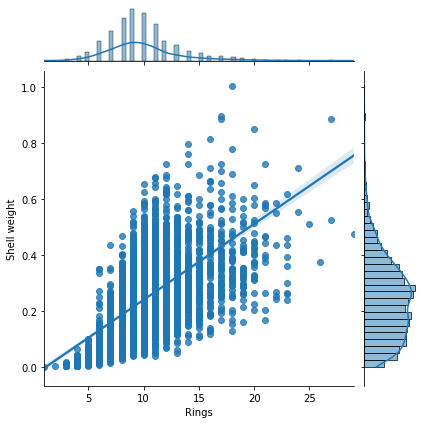

In [32]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=ds, x='Rings', y='Height',  kind='reg')
_ = sns.jointplot(data=ds, x='Rings', y='Shell weight', kind='reg')

Above graph show that Abalone grows in size and weight at certain age of uto 15 years after this age their size and age remains stable in relation to their age depending upon on enviormental & location factors also.

<Figure size 1440x360 with 0 Axes>

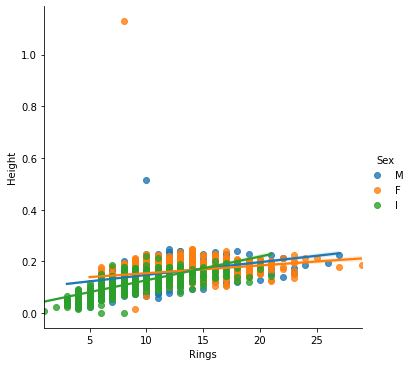

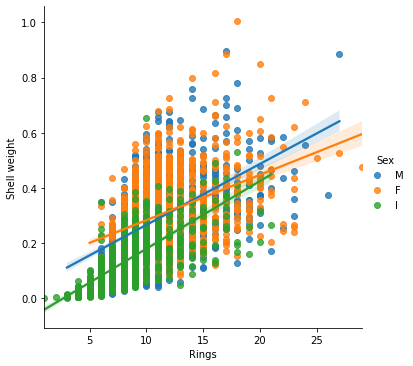

In [134]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=ds, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=ds, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

From above figure we can conclude that as there is no significant effect of sex in relation to size,weight and number of rings.

<AxesSubplot:>

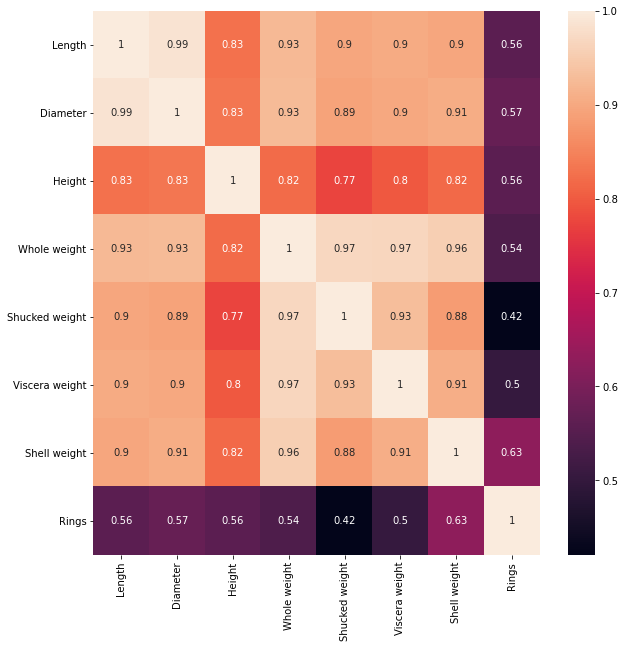

In [135]:
dscorr=ds.corr()
dscorr
plt.figure(figsize=(10,10))
sns.heatmap(dscorr,annot=True)

From above correlation matrix all attributes are correlated with number of  Rings while height and shell weigth is most corelated to Rings

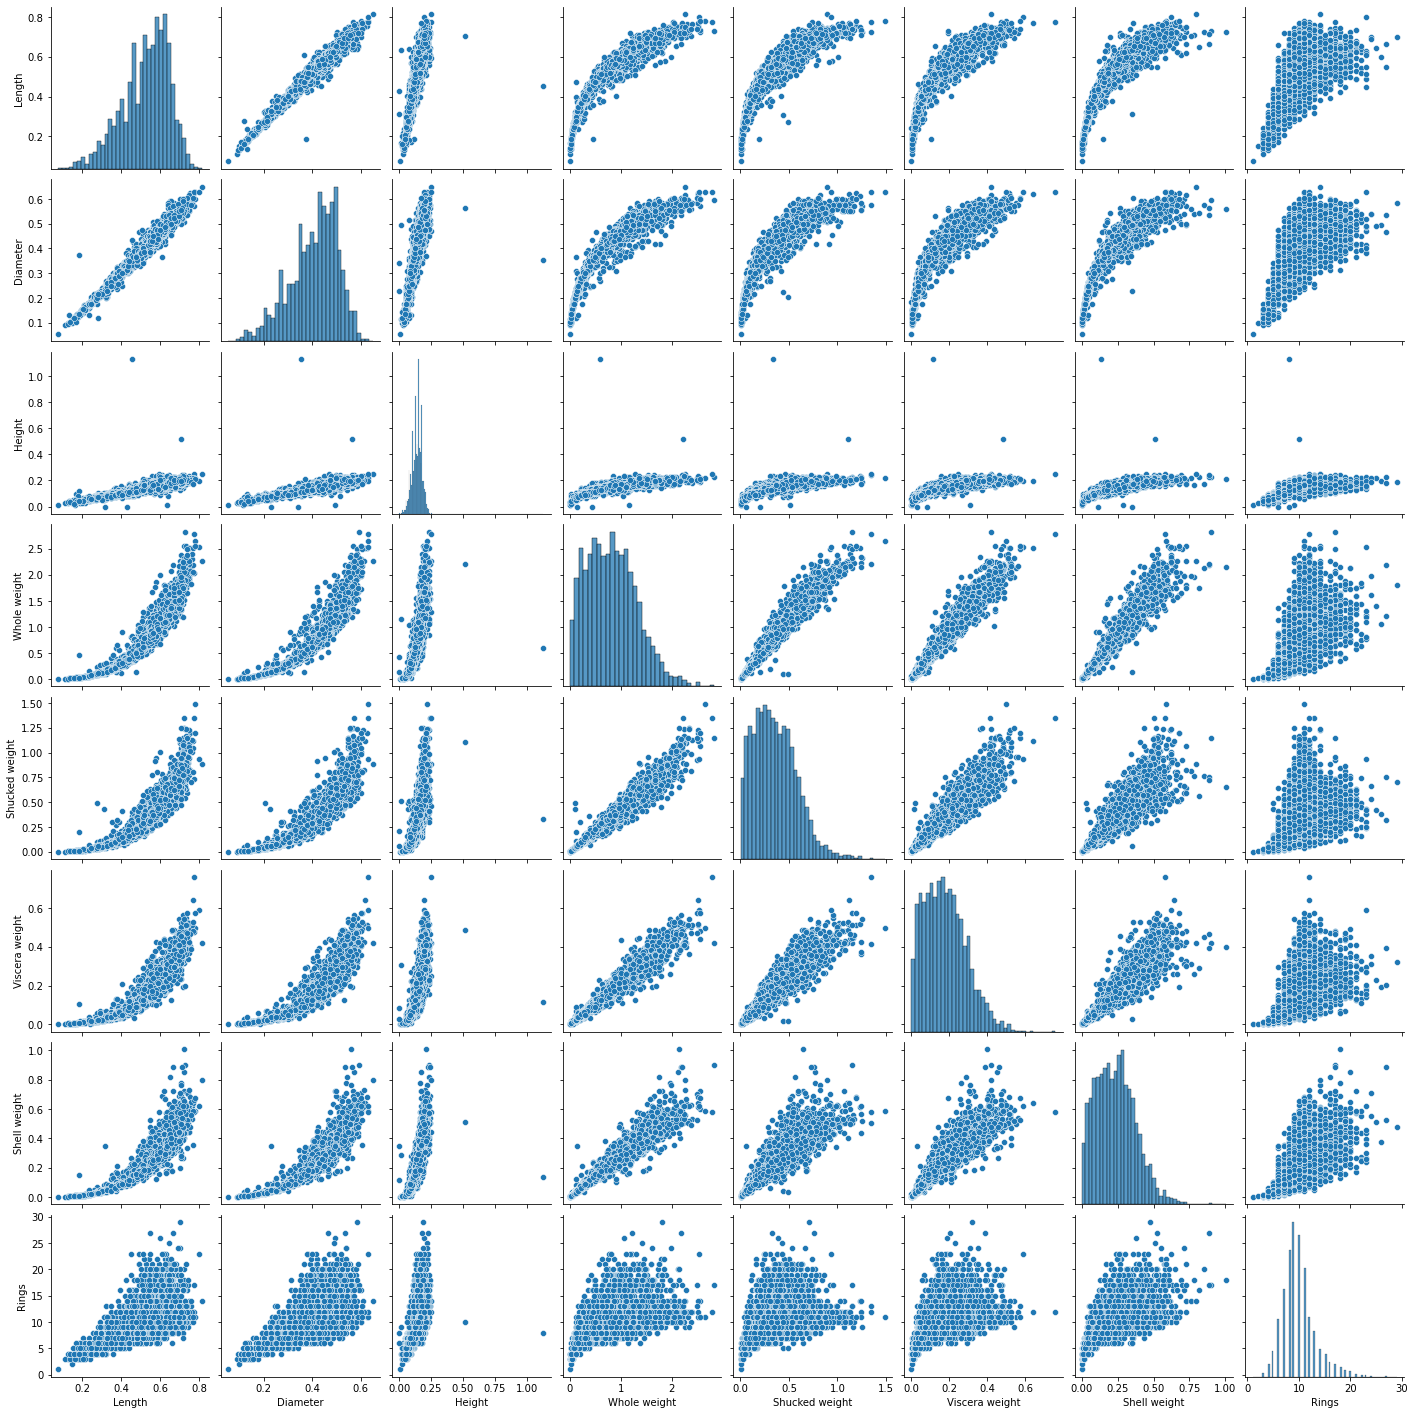

In [136]:
sns.pairplot(ds)

# Data Manipulation

As in dataset we have categorial value in sex column which is requried to be encoded for further model analysis ,fitting and removing the outliers from dataset

In [137]:
le=LabelEncoder()
ds['Sex']=le.fit_transform(ds['Sex'])

In [138]:
ds

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


After encoding we got results as follow:

    Infant=1
    Females=0
    Males=2

# Checking outliers through statistical

In [139]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [140]:
z[6][8]

3.12251641377204

In [141]:
z[166][7]

4.3910243577240236

In [142]:
z[4148][6]

3.1514857327663592

Removing the outliers from dataset

In [143]:
df1=ds[(z<3).all(axis=1)]
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [144]:
print('Shape of dataset before outliers',ds.shape)
print('Shape of dataset after removing outliers',df1.shape)
print('Loss of data is :',(ds.shape[0]-df1.shape[0])/ds.shape[0])

Shape of dataset before outliers (4177, 9)
Shape of dataset after removing outliers (4027, 9)
Loss of data is : 0.035910940866650705


So overall there is loss of 3.5% of data after removing the outliers through zscore

# Preparing the data for training and test split

In [145]:
x=df1.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [146]:
y=df1.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

# Model Fitting through Regression Methods

Linear Regression

In [147]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    predlm=lm.predict(x_test)
    predl=lm.predict(x_train)
    print(f'At random state {i},the training accuracy is :-{r2_score(y_train,predl)}')
    print(f'At random state {i},the training accuracy is :-{r2_score(y_test,predlm)}')
    print('\n')

At random state 0,the training accuracy is :-0.5280748773188936
At random state 0,the training accuracy is :-0.4833215889142318


At random state 1,the training accuracy is :-0.524160819927308
At random state 1,the training accuracy is :-0.488232366311222


At random state 2,the training accuracy is :-0.5174410108906962
At random state 2,the training accuracy is :-0.5047652774363687


At random state 3,the training accuracy is :-0.5132580426551034
At random state 3,the training accuracy is :-0.512735716945908


At random state 4,the training accuracy is :-0.5074186277737656
At random state 4,the training accuracy is :-0.5261443365398808


At random state 5,the training accuracy is :-0.5225401558830584
At random state 5,the training accuracy is :-0.4951778062944324


At random state 6,the training accuracy is :-0.5150117647268841
At random state 6,the training accuracy is :-0.5089674897633251


At random state 7,the training accuracy is :-0.5312563229820606
At random state 7,the trainin

At random state 66,the training accuracy is :-0.5116561472235182
At random state 66,the training accuracy is :-0.5173475830429853


At random state 67,the training accuracy is :-0.5240078540020525
At random state 67,the training accuracy is :-0.49201267481708943


At random state 68,the training accuracy is :-0.5118634884082078
At random state 68,the training accuracy is :-0.51347051051731


At random state 69,the training accuracy is :-0.5083480385067876
At random state 69,the training accuracy is :-0.5220236955911735


At random state 70,the training accuracy is :-0.5144946886381634
At random state 70,the training accuracy is :-0.5112993107761155


At random state 71,the training accuracy is :-0.5126167038425173
At random state 71,the training accuracy is :-0.5151021997971093


At random state 72,the training accuracy is :-0.4987851591089506
At random state 72,the training accuracy is :-0.5394879446425564


At random state 73,the training accuracy is :-0.5070982606608684
At random st

Optimal random state is 45

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
predlm=lm.predict(x_test)
print('R_2score is:',r2_score(y_test,predlm))
print('error:')
print('Mean_squared error:',mean_squared_error(y_test,predlm))
print('Mean_absolute error:',mean_absolute_error(y_test,predlm))

R_2score is: 0.5393466933702957
error:
Mean_squared error: 3.948145357800411
Mean_absolute error: 1.5047658840323799


Through Linear Regression model we are getting r2_score 53% along with MAE of 1.5 which shows that there will chance of error in between predicted and expected values

In [149]:
print('Predicted result',predlm)
print('Actual result',y_test)

Predicted result [9.03325473 9.99483148 5.80023446 ... 8.4011577  6.61947975 7.82427649]
Actual result 3847     9
3824     7
2713     4
804     10
429     18
        ..
2823     7
3883    10
1848     9
332      5
635      8
Name: Rings, Length: 1329, dtype: int64


From above prediction results in compare to actual one we can clearly observe that there is absoulte error of 1.5

In [150]:
print('Intercept is:',lm.intercept_)
print('Coef is:',lm.coef_)

Intercept is: 2.784843881888925
Coef is: [  0.08656656  -1.80605005  10.24178252  25.33143053   7.03633635
 -17.23077858  -6.76136278   7.46343555]


Intercept of data os 2.78 mean that min age of abalone will be near to 2-3 years of newly born.
Through Coef ,change in value of each of independent variables shows the numerical effect on dependent variable(no.of rings).

Support Vector Regressor

In [151]:
kernellist=['linear','rbf','poly']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    pred_y=sv.predict(x_test)
    print('kernellist:',i)
    print(sv.score(x_train,y_train))
    print('R2_score:',r2_score(y_test,pred_y))
    print('MSE score :',mean_squared_error(y_test,pred_y))
    print('MAE:',mean_absolute_error(y_test,pred_y))

kernellist: linear
0.4382112341895744
R2_score: 0.4811873589491681
MSE score : 4.446614603332426
MAE: 1.488896048287303
kernellist: rbf
0.46326276854910353
R2_score: 0.5126708988380316
MSE score : 4.17677698343391
MAE: 1.4292242179101902
kernellist: poly
0.40549920008469675
R2_score: 0.4251969099504842
MSE score : 4.926494869280483
MAE: 1.583108583011736


From Support Vector Regressor (rbf)we are getting accuracy of  51% with lowest mean errors.

In [153]:
svscores=cross_val_score(sv,x,y,cv=6)
print(svscores)
print(svscores.mean(),svscores.std())

[0.13333187 0.50686573 0.39396701 0.41181977 0.36953755 0.43700906]
0.3754218323497453 0.11646272134671504


after over and under fitting the SVR model through Cross val score we are getting avg mean accuracy of 38% which is very low.

Decision Tree Regressor

In [154]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_d=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print('R2_score:',r2_score(y_test,pred_d))
print('MSE score :',mean_squared_error(y_test,pred_d))
print('MAE:',mean_absolute_error(y_test,pred_d))

1.0
R2_score: 0.08862886505455725
MSE score : 7.8111361926260345
MAE: 2.035364936042137


Decision Tree regressor provides score during training is 100% while after testing we are getting accuracy 72% .

In [155]:
dtrscores=cross_val_score(dtr,x,y,cv=10)
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[ 0.08512419 -0.0201924  -0.10250879 -0.98974352 -0.60299683  0.14884612
 -0.15196497 -0.02853053  0.21623596  0.02844046]
-0.1417290322234879 0.354135214626723


In [156]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print(knn.score(x_train,y_train))
print('R2_score:',r2_score(y_test,pred_k))
print('MSE score :',mean_squared_error(y_test,pred_k))
print('MAE:',mean_absolute_error(y_test,pred_k))

0.6264883796563135
R2_score: 0.5504249508716862
MSE score : 3.8531963575497916
MAE: 1.4341610233258089


Before cross validating the accuracy score is 53%

In [157]:
knnscores=cross_val_score(knn,x,y,cv=6)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.31787064 0.57753348 0.3461225  0.53162446 0.51992353 0.5053404 ]
0.46640249947792994 0.09790612182297923


From Kneighbors we are getting mean accuracy of 46% after setting the under and over fitting

In [158]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(knn.score(x_train,y_train))
print('R2_score:',r2_score(y_test,predg))
print('MSE score :',mean_squared_error(y_test,predg))
print('MAE:',mean_absolute_error(y_test,predg))

0.6264883796563135
R2_score: 0.17299719765089394
MSE score : 7.08803611738149
MAE: 1.8058690744920993


In [159]:
gnbscores=cross_val_score(gnb,x,y,cv=10)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.13647643 0.20099256 0.29280397 0.25310174 0.26799007 0.21588089
 0.30272953 0.20646766 0.28358209 0.25124378]
0.2411268718442527 0.04861721451446769


From Gaussian NB we are getting very less accuracy score and high mean error

# Reguarlization Methods

In [160]:
from sklearn.linear_model import Lasso,Ridge

In [161]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.49859342887403413

In [162]:
ls.coef_

array([  0.08254751,   0.        ,   8.15272367,  21.72568506,
         6.27224575, -16.50975034,  -4.71127458,   8.33373369])

In [163]:
rs=Ridge(alpha=0.001)
rs.fit(x_train,y_train)
rs.score(x_train,y_train)

0.4995608845485091

In [164]:
rs.coef_

array([  0.0865503 ,  -1.79293077,  10.23162272,  25.29033322,
         7.03321321, -17.22779177,  -6.7543345 ,   7.47121892])

In [165]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.485445944308429

In [166]:
enr.coef_

array([  0.06879551,   2.66869593,   6.01723992,   8.53362951,
         4.93869455, -13.93278743,  -2.10938116,   9.63636723])

From Regulization methods of Linear we are getting best scores from Ridge i.e 50% and alpha being 0.001

# Ensemble Methods

In [167]:
ada=AdaBoostRegressor(n_estimators=100)
ada.fit(x_train,y_train)
predicta=ada.predict(x_test)
ada.score(x_train,y_train)
print('R2_score:',r2_score(y_test,predicta))
print('MSE score :',mean_squared_error(y_test,predicta))
print('MAE:',mean_absolute_error(y_test,predicta))

R2_score: 0.406898814988365
MSE score : 5.083323307590934
MAE: 1.86143860142785


In [168]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predictrf=rf.predict(x_test)
rf.score(x_train,y_train)
print('R2_score:',r2_score(y_test,predictrf))
print('MSE score :',mean_squared_error(y_test,predictrf))
print('MAE:',mean_absolute_error(y_test,predictrf))

R2_score: 0.5597498165082948
MSE score : 3.773275244544771
MAE: 1.4455680963130173


In [169]:
gb=GradientBoostingRegressor(n_estimators=100)
gb.fit(x_train,y_train)
preditg=gb.predict(x_test)
gb.score(x_train,y_train)
print('R2_score:',r2_score(y_test,preditg))
print('MSE score :',mean_squared_error(y_test,preditg))
print('MAE:',mean_absolute_error(y_test,preditg))

R2_score: 0.5780058322304931
MSE score : 3.6168074569739597
MAE: 1.4084052504515656


From Ensemble methods we are getting best scores of 57% through GradientBoosting regressor with minimum mean error

# Hypertuning of Parameters

In [170]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
clf

GridSearchCV(estimator=SVR(kernel='poly'),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [171]:
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [173]:
sv=SVR(kernel='rbf',C=10)
sv.fit(x,y)
h=sv.score(x,y)
print(round(h,2))

0.55


After hypertuning the SVR model we have observed score of 55% with rbf parameter.

In [174]:
grid_param={'criterion':['mse','mae','friedman_mse','poisson']}
gd_sr=GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'mse'}
0.2048699967634049


In [175]:
dtr=DecisionTreeRegressor(criterion='friedman_mse')
dtr.fit(x,y)
dtr.score(x,y)
print('R2_score:',r2_score(y_test,pred_d))
print('MSE score :',mean_squared_error(y_test,pred_d))
print('MAE:',mean_absolute_error(y_test,pred_d))

R2_score: 0.08862886505455725
MSE score : 7.8111361926260345
MAE: 2.035364936042137


.

After hypertuning of Decision tree regressor model we have analysed the r2_score is 88% highest among all the models but having mean error scores are high.

In [176]:
grid_parameters={'n_estimators':[100,150,200],'learning_rate':[.1,.01,.001],'random_state':[0,1]}
grd=GridSearchCV(estimator=gb,param_grid=grid_parameters,scoring='neg_mean_squared_error',n_jobs=1,cv=3)
grd.fit(x_train,y_train)
best_param=grd.best_params_
print(best_param)
best_result=grd.best_score_
print(best_result)

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}
-3.9014835179176663


In [177]:
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=0)
gb.fit(x_train,y_train)
preditg=gb.predict(x_test)
gb.score(x_train,y_train)
print('R2_score:',r2_score(y_test,preditg))
print('MSE score :',mean_squared_error(y_test,preditg))
print('MAE:',mean_absolute_error(y_test,preditg))

R2_score: 0.5784183654558488
MSE score : 3.6132717369103338
MAE: 1.4071842427619805


# Conclusion

After hypertuning parameters of model we are getting best accuracy (r2_score) of 58% from Gradient Boosting regressor model as well as mean error scores also less

# Predictions

In [178]:
print('Predicted score',preditg)
print('Acutal score',y_test)

Predicted score [ 8.24128019 10.4390347   4.9914971  ...  8.91937947  6.11356926
  7.942051  ]
Acutal score 3847     9
3824     7
2713     4
804     10
429     18
        ..
2823     7
3883    10
1848     9
332      5
635      8
Name: Rings, Length: 1329, dtype: int64


There is less difference in between predicted and actual values from Gradient boosting regressor model

# Loading the model in obj file

In [179]:
import joblib
joblib.dump(gb,'grd model.obj')

['grd model.obj']

# Re-load the obj file

In [180]:
gbfile=joblib.load('grd model.obj')
gbfile.predict(x_test)

array([ 8.24128019, 10.4390347 ,  4.9914971 , ...,  8.91937947,
        6.11356926,  7.942051  ])

In [ ]:
obj file is working fine on predictions